<a href="https://colab.research.google.com/github/namuduris/Prediction-of-Health-Insurance-Using-ML/blob/main/Copy_of_fourth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Importing the dataset

In [2]:
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [5]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-8-c0c418315878>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


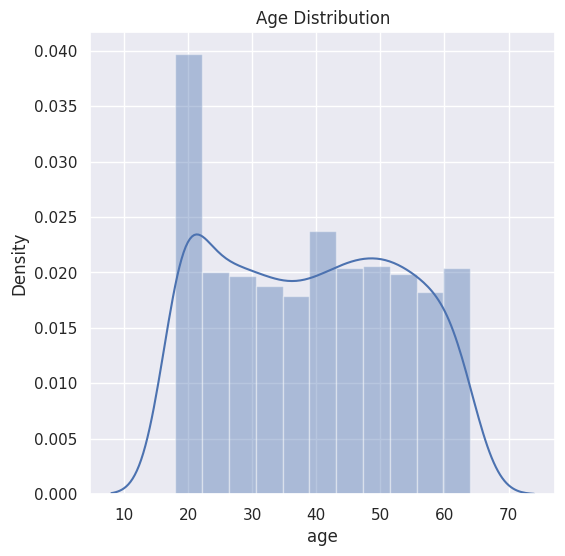

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

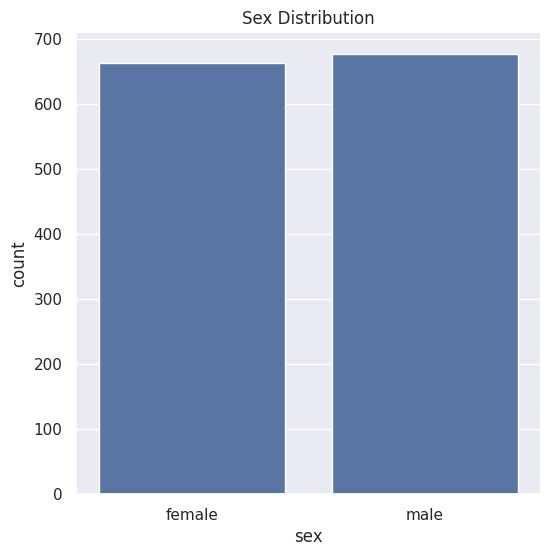

In [9]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-11-81b69896b0d5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


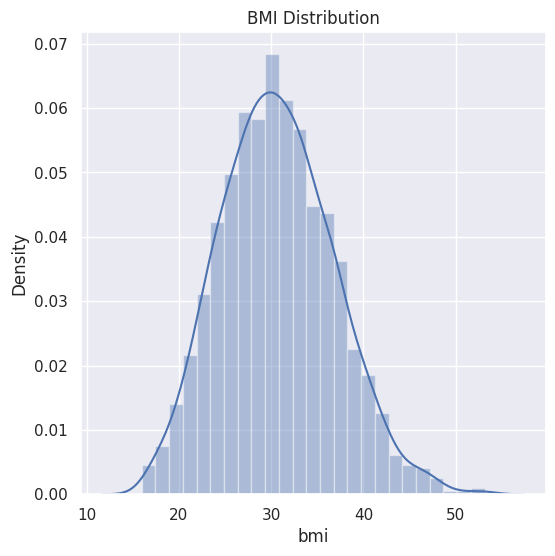

In [11]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

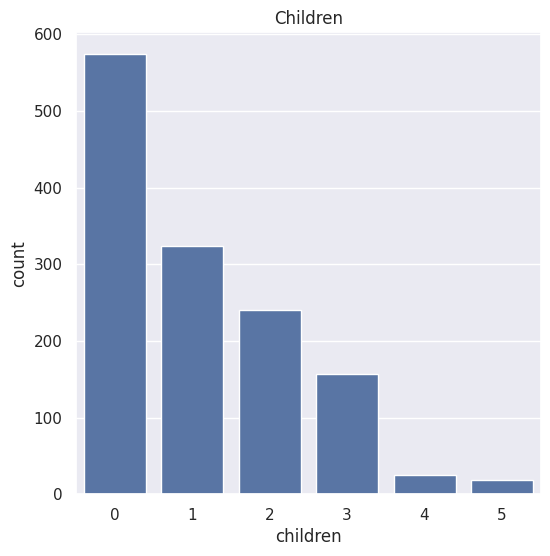

In [12]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


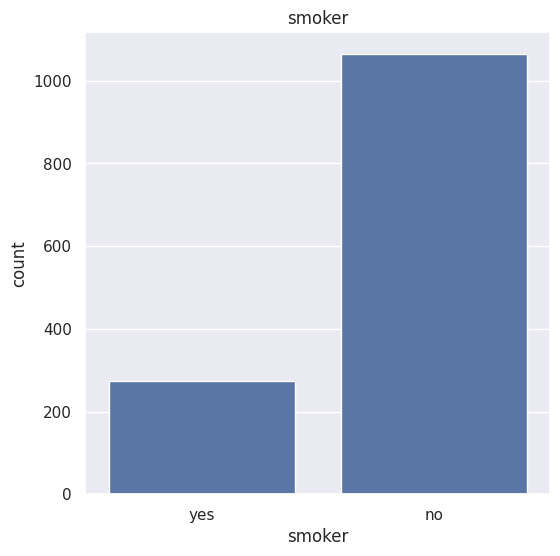

In [14]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


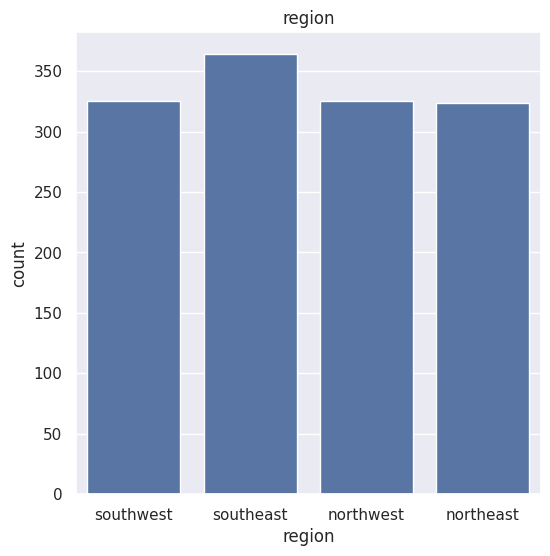

In [16]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-18-a2fe9b394a51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


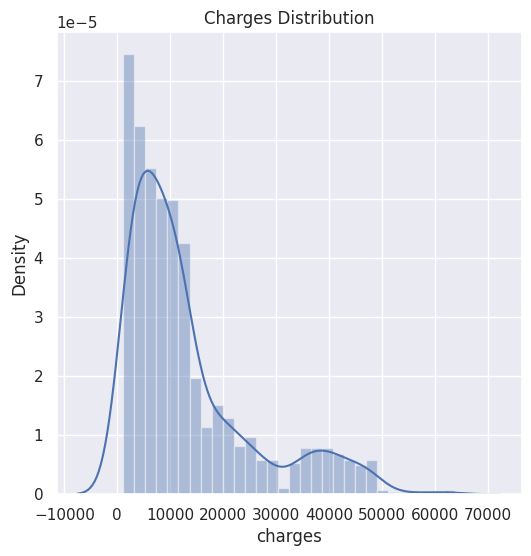

In [18]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [19]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

<ipython-input-19-7d5826986d65>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
<ipython-input-19-7d5826986d65>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
<ipython-input-19-7d5826986d65>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to th

In [20]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [21]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [22]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Training the Linear Regression model on the whole dataset

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [24]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


LINEAR REGRESSION

In [25]:
regressor = LinearRegression()

In [26]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model evaluation

In [27]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [28]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [29]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [30]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684076


In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y_train)


LinearRegression()

In [32]:
from sklearn.metrics import r2_score
test_data_prediction1 = lin_reg_2.predict(poly_reg.transform(X_test))

# 2. Calculate the R-squared value
r2_poly = r2_score(Y_test, test_data_prediction1)

# 3. Print the R-squared value
print('R-squared value for Polynomial Regression:', r2_poly)

R-squared value for Polynomial Regression: 0.7862405337583788


Testing


Linear Regression

In [33]:
input_data = (52,1,30.78,1,1,2)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[11710.76508787]
The insurance cost is USD  11710.765087870981


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Polynomail Regression

In [34]:
lin_reg_2.predict(poly_reg.fit_transform([[52,1,30.78,1,1,2]]))

array([12147.02617455])

## Training the Polynomial Regression model on the whole dataset

## Visualising the Linear Regression results

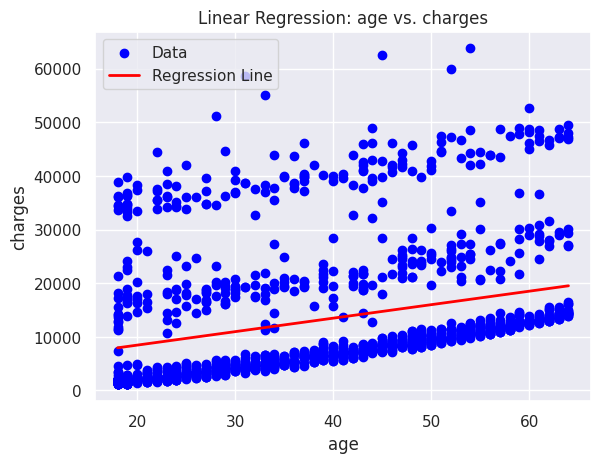

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have:
# - Trained Linear Regression model: 'regressor'
# - Feature data: 'X'
# - Target variable: 'Y'

# Choose a predictor variable to visualize (e.g., 'age')
predictor_variable = 'age'
predictor_index = X.columns.get_loc(predictor_variable)

# Create a range of values for the predictor variable
x_range = np.linspace(X[predictor_variable].min(), X[predictor_variable].max(), 100)

# Create a DataFrame with the predictor variable and average values for other features
X_vis = pd.DataFrame(np.repeat(X.mean().values.reshape(1, -1), 100, axis=0), columns=X.columns)
X_vis[predictor_variable] = x_range

# Get predictions for the visualization data
y_pred = regressor.predict(X_vis)

# Plot the data and the regression line
plt.scatter(X[predictor_variable], Y, color='blue', label='Data')  # Scatter plot of actual data
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Regression Line')  # Regression line

plt.xlabel(predictor_variable)
plt.ylabel('charges')
plt.title('Linear Regression: {} vs. charges'.format(predictor_variable))
plt.legend()
plt.show()

## Visualising the Polynomial Regression results

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


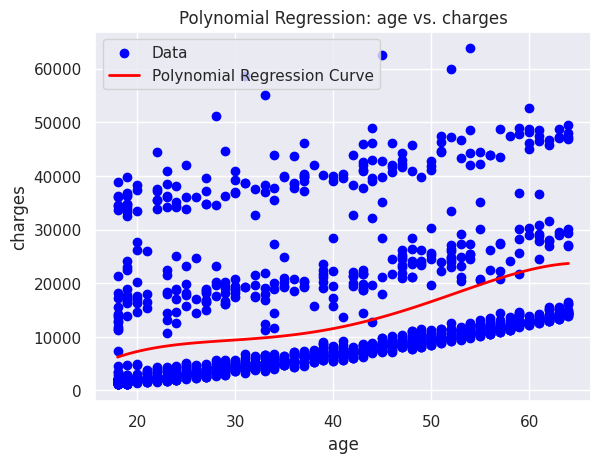

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have:
# - Trained Polynomial Regression model: 'lin_reg_2'
# - Polynomial features transformer: 'poly_reg'
# - Feature data: 'X'
# - Target variable: 'Y'

# Choose a predictor variable to visualize (e.g., 'age')
predictor_variable = 'age'
predictor_index = X.columns.get_loc(predictor_variable)

# Create a range of values for the predictor variable
x_range = np.linspace(X[predictor_variable].min(), X[predictor_variable].max(), 100)

# Create a DataFrame with the predictor variable and average values for other features
X_vis = pd.DataFrame(np.repeat(X.mean().values.reshape(1, -1), 100, axis=0), columns=X.columns)
X_vis[predictor_variable] = x_range

# Transform the visualization data using the polynomial features transformer
X_vis_poly = poly_reg.transform(X_vis)

# Get predictions for the visualization data
y_pred = lin_reg_2.predict(X_vis_poly)

# Plot the data and the polynomial regression curve
plt.scatter(X[predictor_variable], Y, color='blue', label='Data')  # Scatter plot of actual data
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Polynomial Regression Curve')  # Polynomial curve

plt.xlabel(predictor_variable)
plt.ylabel('charges')
plt.title('Polynomial Regression: {} vs. charges'.format(predictor_variable))
plt.legend()
plt.show()

XG Boost

In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have:
# - Feature data: 'X'
# - Target variable: 'Y'
# - Training and testing data (X_train, X_test, Y_train, Y_test) from train_test_split

# 1. Create an XGBoost regressor object
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # You can adjust hyperparameters here

# 2. Train the model
xgb_regressor.fit(X_train, Y_train)

# 3. Make predictions on the test set
y_pred_xgb = xgb_regressor.predict(X_test)

# 4. Evaluate the model
mse_xgb = mean_squared_error(Y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(Y_test, y_pred_xgb)

# 5. Print the evaluation metrics
print("XGBoost Model:")
print("Mean Squared Error:", mse_xgb)
print("Root Mean Squared Error:", rmse_xgb)
print("R-squared:", r2_xgb)

XGBoost Model:
Mean Squared Error: 27868792.00218221
Root Mean Squared Error: 5279.090073315875
R-squared: 0.8144316777193814


In [38]:
input_data = (52, 1, 30.78, 1, 1, 2)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction using XGBoost model
prediction = xgb_regressor.predict(input_data_reshaped)

print(prediction)
print('The insurance cost is USD ', prediction[0])

[10510.703]
The insurance cost is USD  10510.703


Plotting

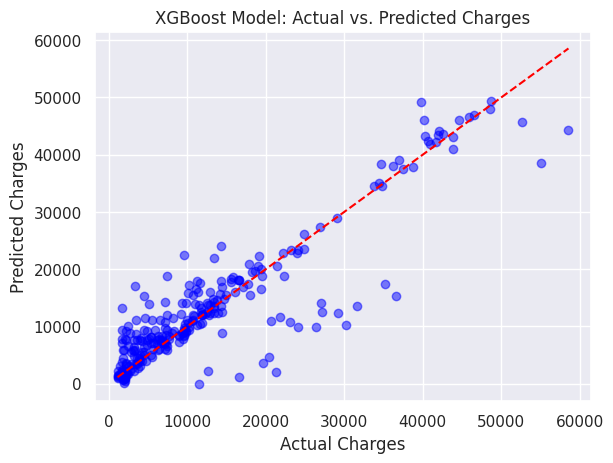

In [39]:
import matplotlib.pyplot as plt

# Assuming you have:
# - Trained XGBoost model: 'xgb_regressor'
# - Test data features: 'X_test'
# - Test data target variable: 'Y_test'
# - Predictions on the test data: 'y_pred_xgb' (from previous code)

# Plot the predicted vs. actual values
plt.scatter(Y_test, y_pred_xgb, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')  # Ideal line (y = x)

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("XGBoost Model: Actual vs. Predicted Charges")
plt.show()

Prediction Using Patients Old data

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Sample Dataset
data = {
    'Age': [25, 30, 35, 40, 45],
    'Sex': [0, 1, 0, 1, 0],  # 0: Male, 1: Female
    'BMI': [32, 28, 22, 35, 30],
    'Children': [0, 1, 2, 0, 3],
    'Smoker': [1, 0, 0, 1, 0],  # 1: Smoker, 0: Non-smoker
    'Region': [0, 1, 2, 3, 1],  # Encoded regions
    'Premium': [35000, 28000, 22000, 40000, 30000]  # Insurance premium
}

# Create DataFrame
df = pd.DataFrame(data)

# Separate features and target
X = df.drop('Premium', axis=1)
y = df['Premium']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
xg_reg.fit(X_train, y_train)

# Predict on test data
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


def adjust_premium_based_on_changes(model, original_data, updated_data):
    """
    Adjusts the premium based on changes in user-provided health metrics.

    :param model: Trained XGBoost model
    :param original_data: DataFrame with original health metrics
    :param updated_data: DataFrame with updated health metrics
    :return: Original premium, updated premium, and adjustment details
    """
    # Predict premiums
    original_premium = model.predict(original_data)[0]
    updated_premium = model.predict(updated_data)[0]

    # Calculate adjustment
    adjustment = updated_premium - original_premium

    # Analyze the changes
    changes = {}
    for column in original_data.columns:
        original_value = original_data.iloc[0][column]
        updated_value = updated_data.iloc[0][column]
        if original_value != updated_value:
            change_type = "Improved" if (column == "BMI" and updated_value < original_value) or \
                                       (column == "Smoker" and updated_value == 0) else "Worsened"
            changes[column] = {
                "original": original_value,
                "updated": updated_value,
                "change_type": change_type
            }

    return original_premium, updated_premium, adjustment, changes


# Example: Original Data
original_data = pd.DataFrame({
    'Age': [30],
    'Sex': [1],
    'BMI': [33],  # Original BMI
    'Children': [1],
    'Smoker': [1],  # Smoker
    'Region': [1]
})

# Example: Updated Data (User-provided changes)
updated_data = pd.DataFrame({
    'Age': [30],
    'Sex': [1],
    'BMI': [19],  # Improved BMI
    'Children': [1],
    'Smoker': [0],  # Quit smoking
    'Region': [1]
})

# Check changes and adjust premiums
original_premium, updated_premium, adjustment, changes = adjust_premium_based_on_changes(xg_reg, original_data, updated_data)

# Display results
print(f"Original Premium: {original_premium}")
print(f"Updated Premium: {updated_premium}")
print(f"Premium Adjustment: {adjustment}")
print("Changes Detected:")
for feature, details in changes.items():
    print(f" - {feature}: {details['original']} -> {details['updated']} ({details['change_type']})")


Mean Squared Error: 35310636.8180275
R2 Score: nan
Original Premium: 34987.97265625
Updated Premium: 22057.724609375
Premium Adjustment: -12930.248046875
Changes Detected:
 - BMI: 33 -> 19 (Improved)
 - Smoker: 1 -> 0 (Improved)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
